In [1]:
## Import Libraries
import pickle
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


In [2]:
df = pd.read_csv("S:\\dataset\\Final_dataset.csv")
df.head()

,diagnosis,texture_mean,area_mean,concavity_mean,area_se,concavity_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,M,10.38,1001.0,0.3001,153.40,0.05373,0.006193,0.1622,0.7119,0.4601,0.11890
1,M,17.77,1326.0,0.0869,74.08,0.01860,0.003532,0.1238,0.2416,0.2750,0.08902
2,M,21.25,1203.0,0.1974,94.03,0.03832,0.004571,0.1444,0.4504,0.3613,0.08758
3,M,20.38,386.1,0.2414,27.23,0.05661,0.009208,0.2098,0.6869,0.6638,0.17300
4,M,14.34,1297.0,0.1980,94.44,0.05688,0.005115,0.1374,0.4000,0.2364,0.07678


In [3]:
df.shape

(569, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   texture_mean             569 non-null    float64
 2   area_mean                569 non-null    float64
 3   concavity_mean           569 non-null    float64
 4   area_se                  569 non-null    float64
 5   concavity_se             569 non-null    float64
 6   fractal_dimension_se     569 non-null    float64
 7   smoothness_worst         569 non-null    float64
 8   concavity_worst          569 non-null    float64
 9   symmetry_worst           569 non-null    float64
 10  fractal_dimension_worst  569 non-null    float64
dtypes: float64(10), object(1)
memory usage: 49.0+ KB


In [5]:
df.describe()

,texture_mean,area_mean,concavity_mean,area_se,concavity_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,19.289649,654.889104,0.088799,40.337079,0.031894,0.003795,0.132369,0.272188,0.290076,0.083946
std,4.301036,351.914129,0.079720,45.491006,0.030186,0.002646,0.022832,0.208624,0.061867,0.018061
min,9.710000,143.500000,0.000000,6.802000,0.000000,0.000895,0.071170,0.000000,0.156500,0.055040
25%,16.170000,420.300000,0.029560,17.850000,0.015090,0.002248,0.116600,0.114500,0.250400,0.071460
50%,18.840000,551.100000,0.061540,24.530000,0.025890,0.003187,0.131300,0.226700,0.282200,0.080040
75%,21.800000,782.700000,0.130700,45.190000,0.042050,0.004558,0.146000,0.382900,0.317900,0.092080
max,39.280000,2501.000000,0.426800,542.200000,0.396000,0.029840,0.222600,1.252000,0.663800,0.207500


### Exporatory Data Analysis

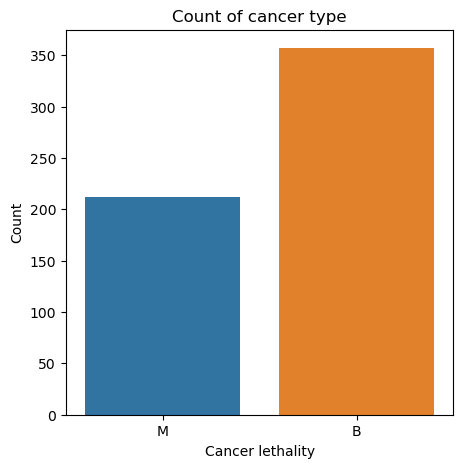

In [6]:
plt.figure(figsize=(5,5))
plt.title('Count of cancer type')
sns.countplot(df['diagnosis'])
plt.xlabel('Cancer lethality')
plt.ylabel('Count')
plt.show()

In [7]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

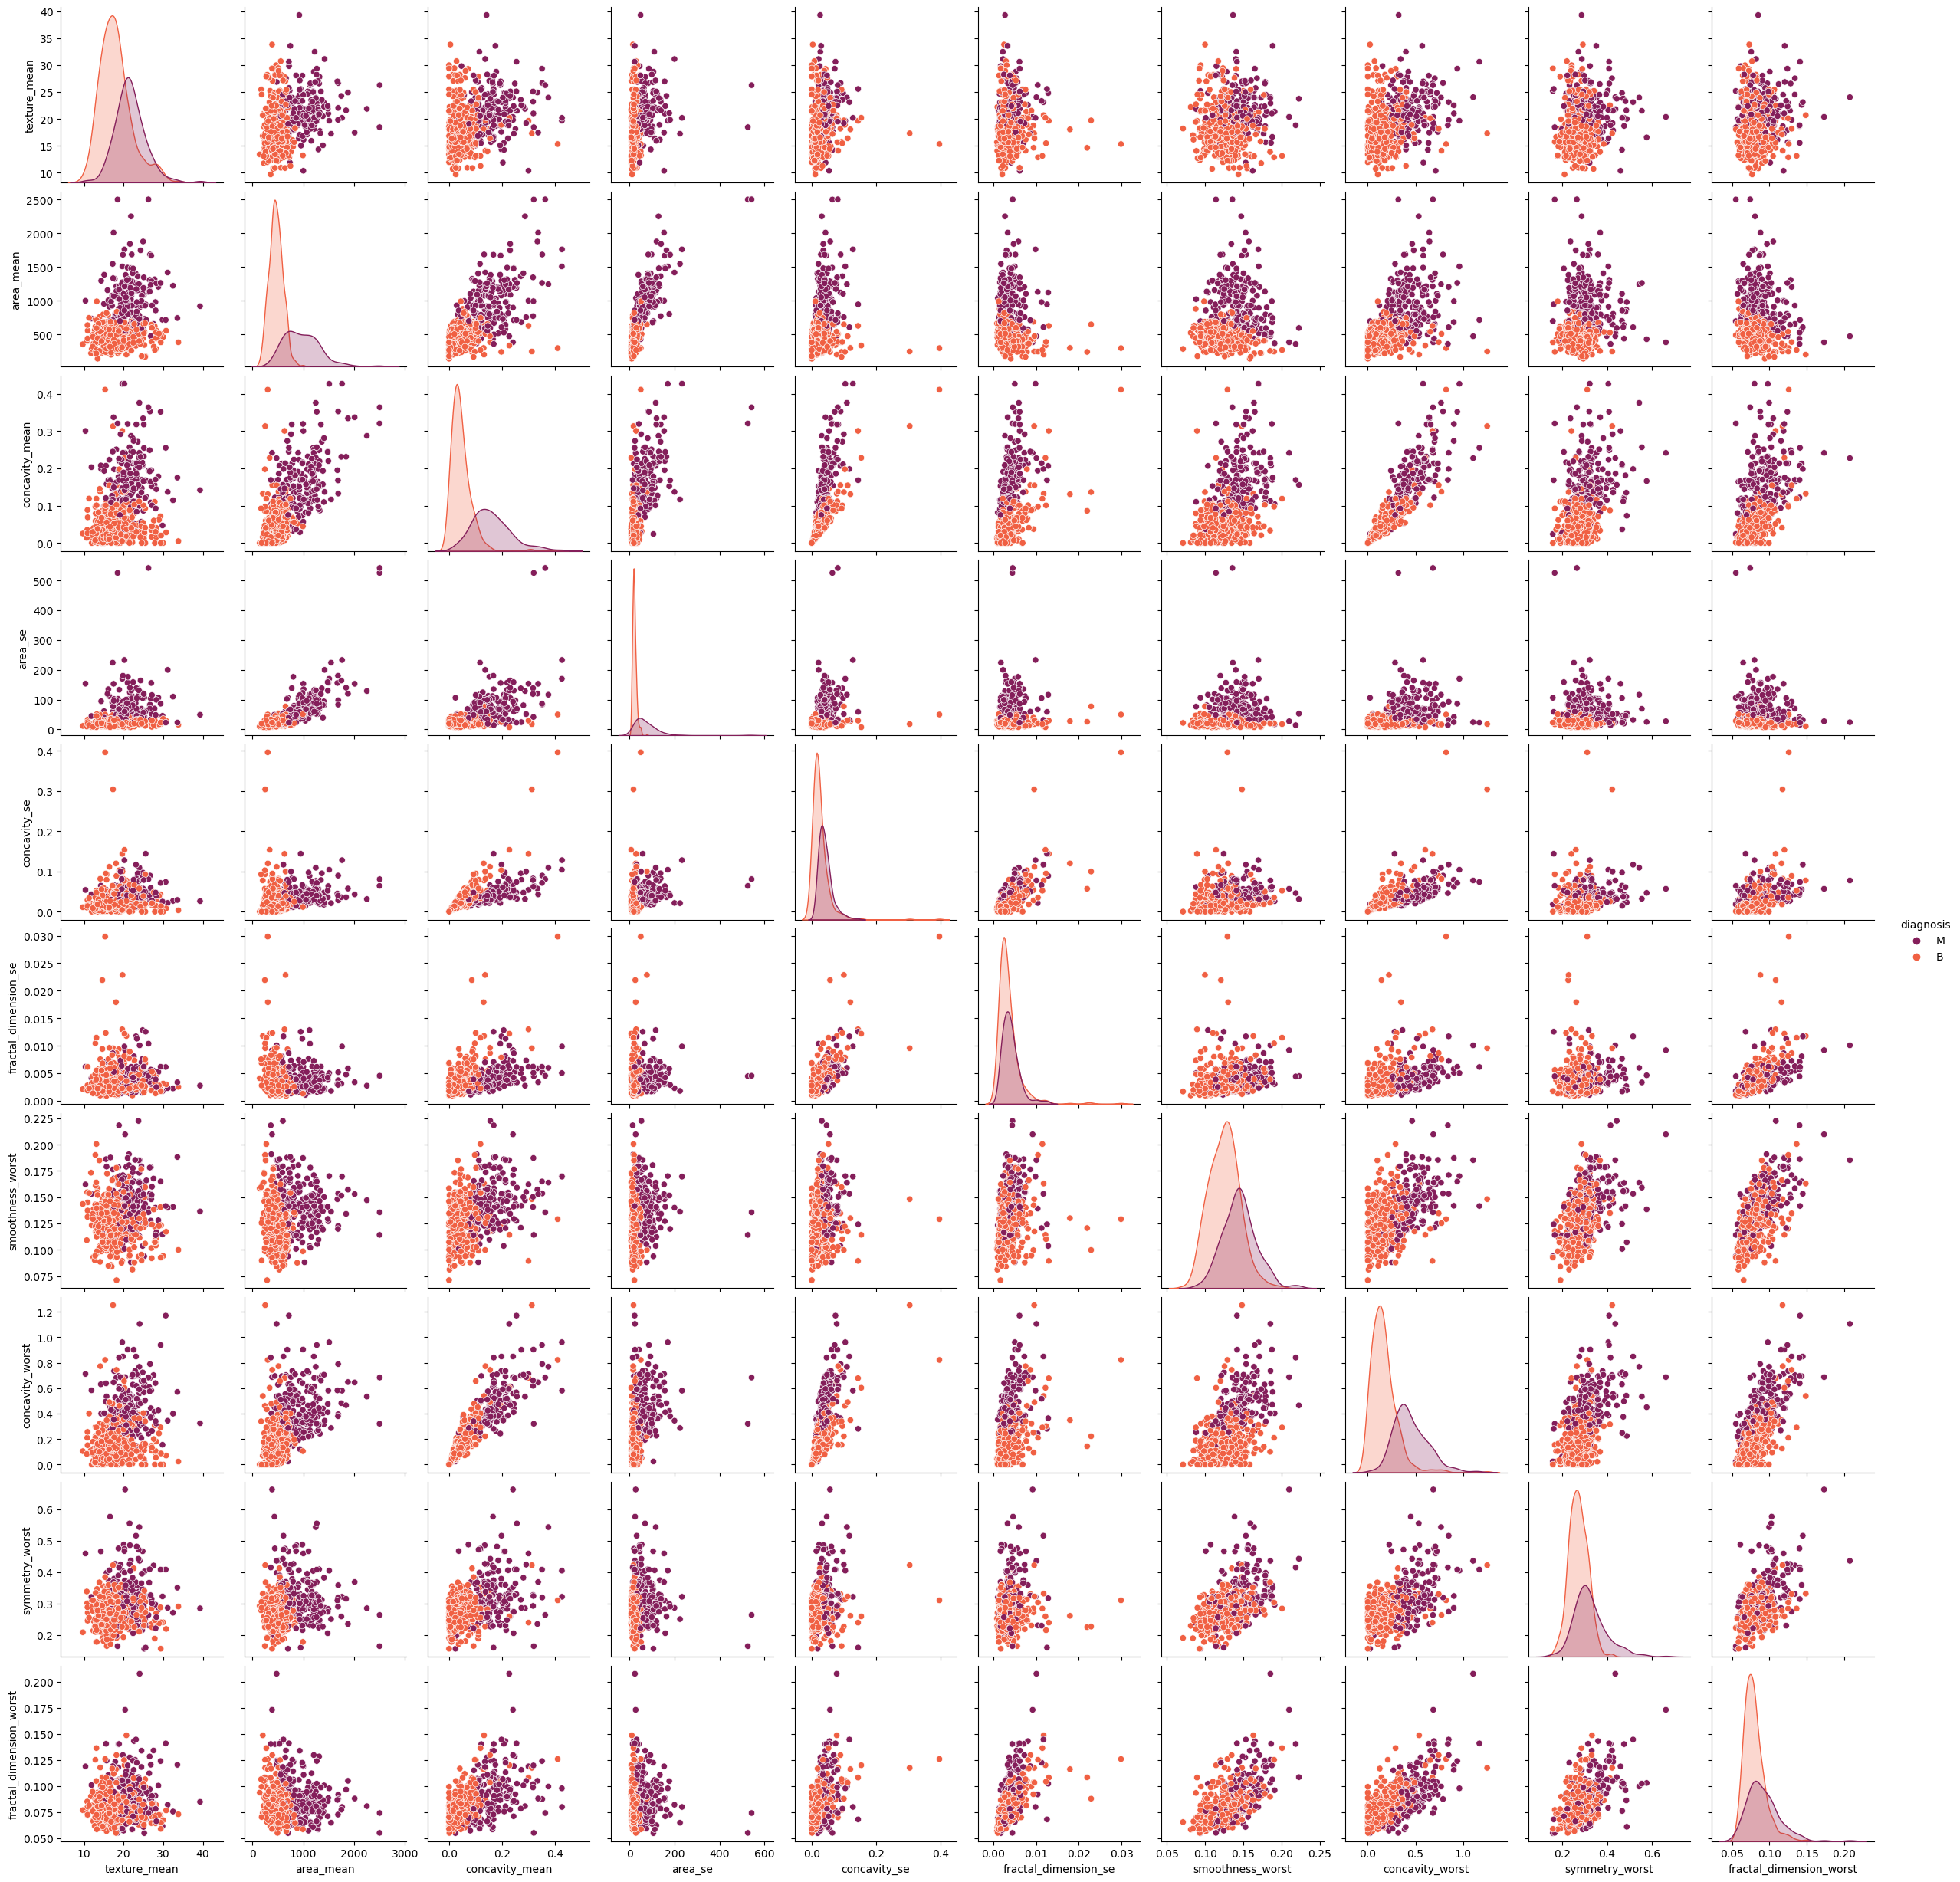

In [8]:
sns.pairplot(df, hue='diagnosis', palette='rocket')

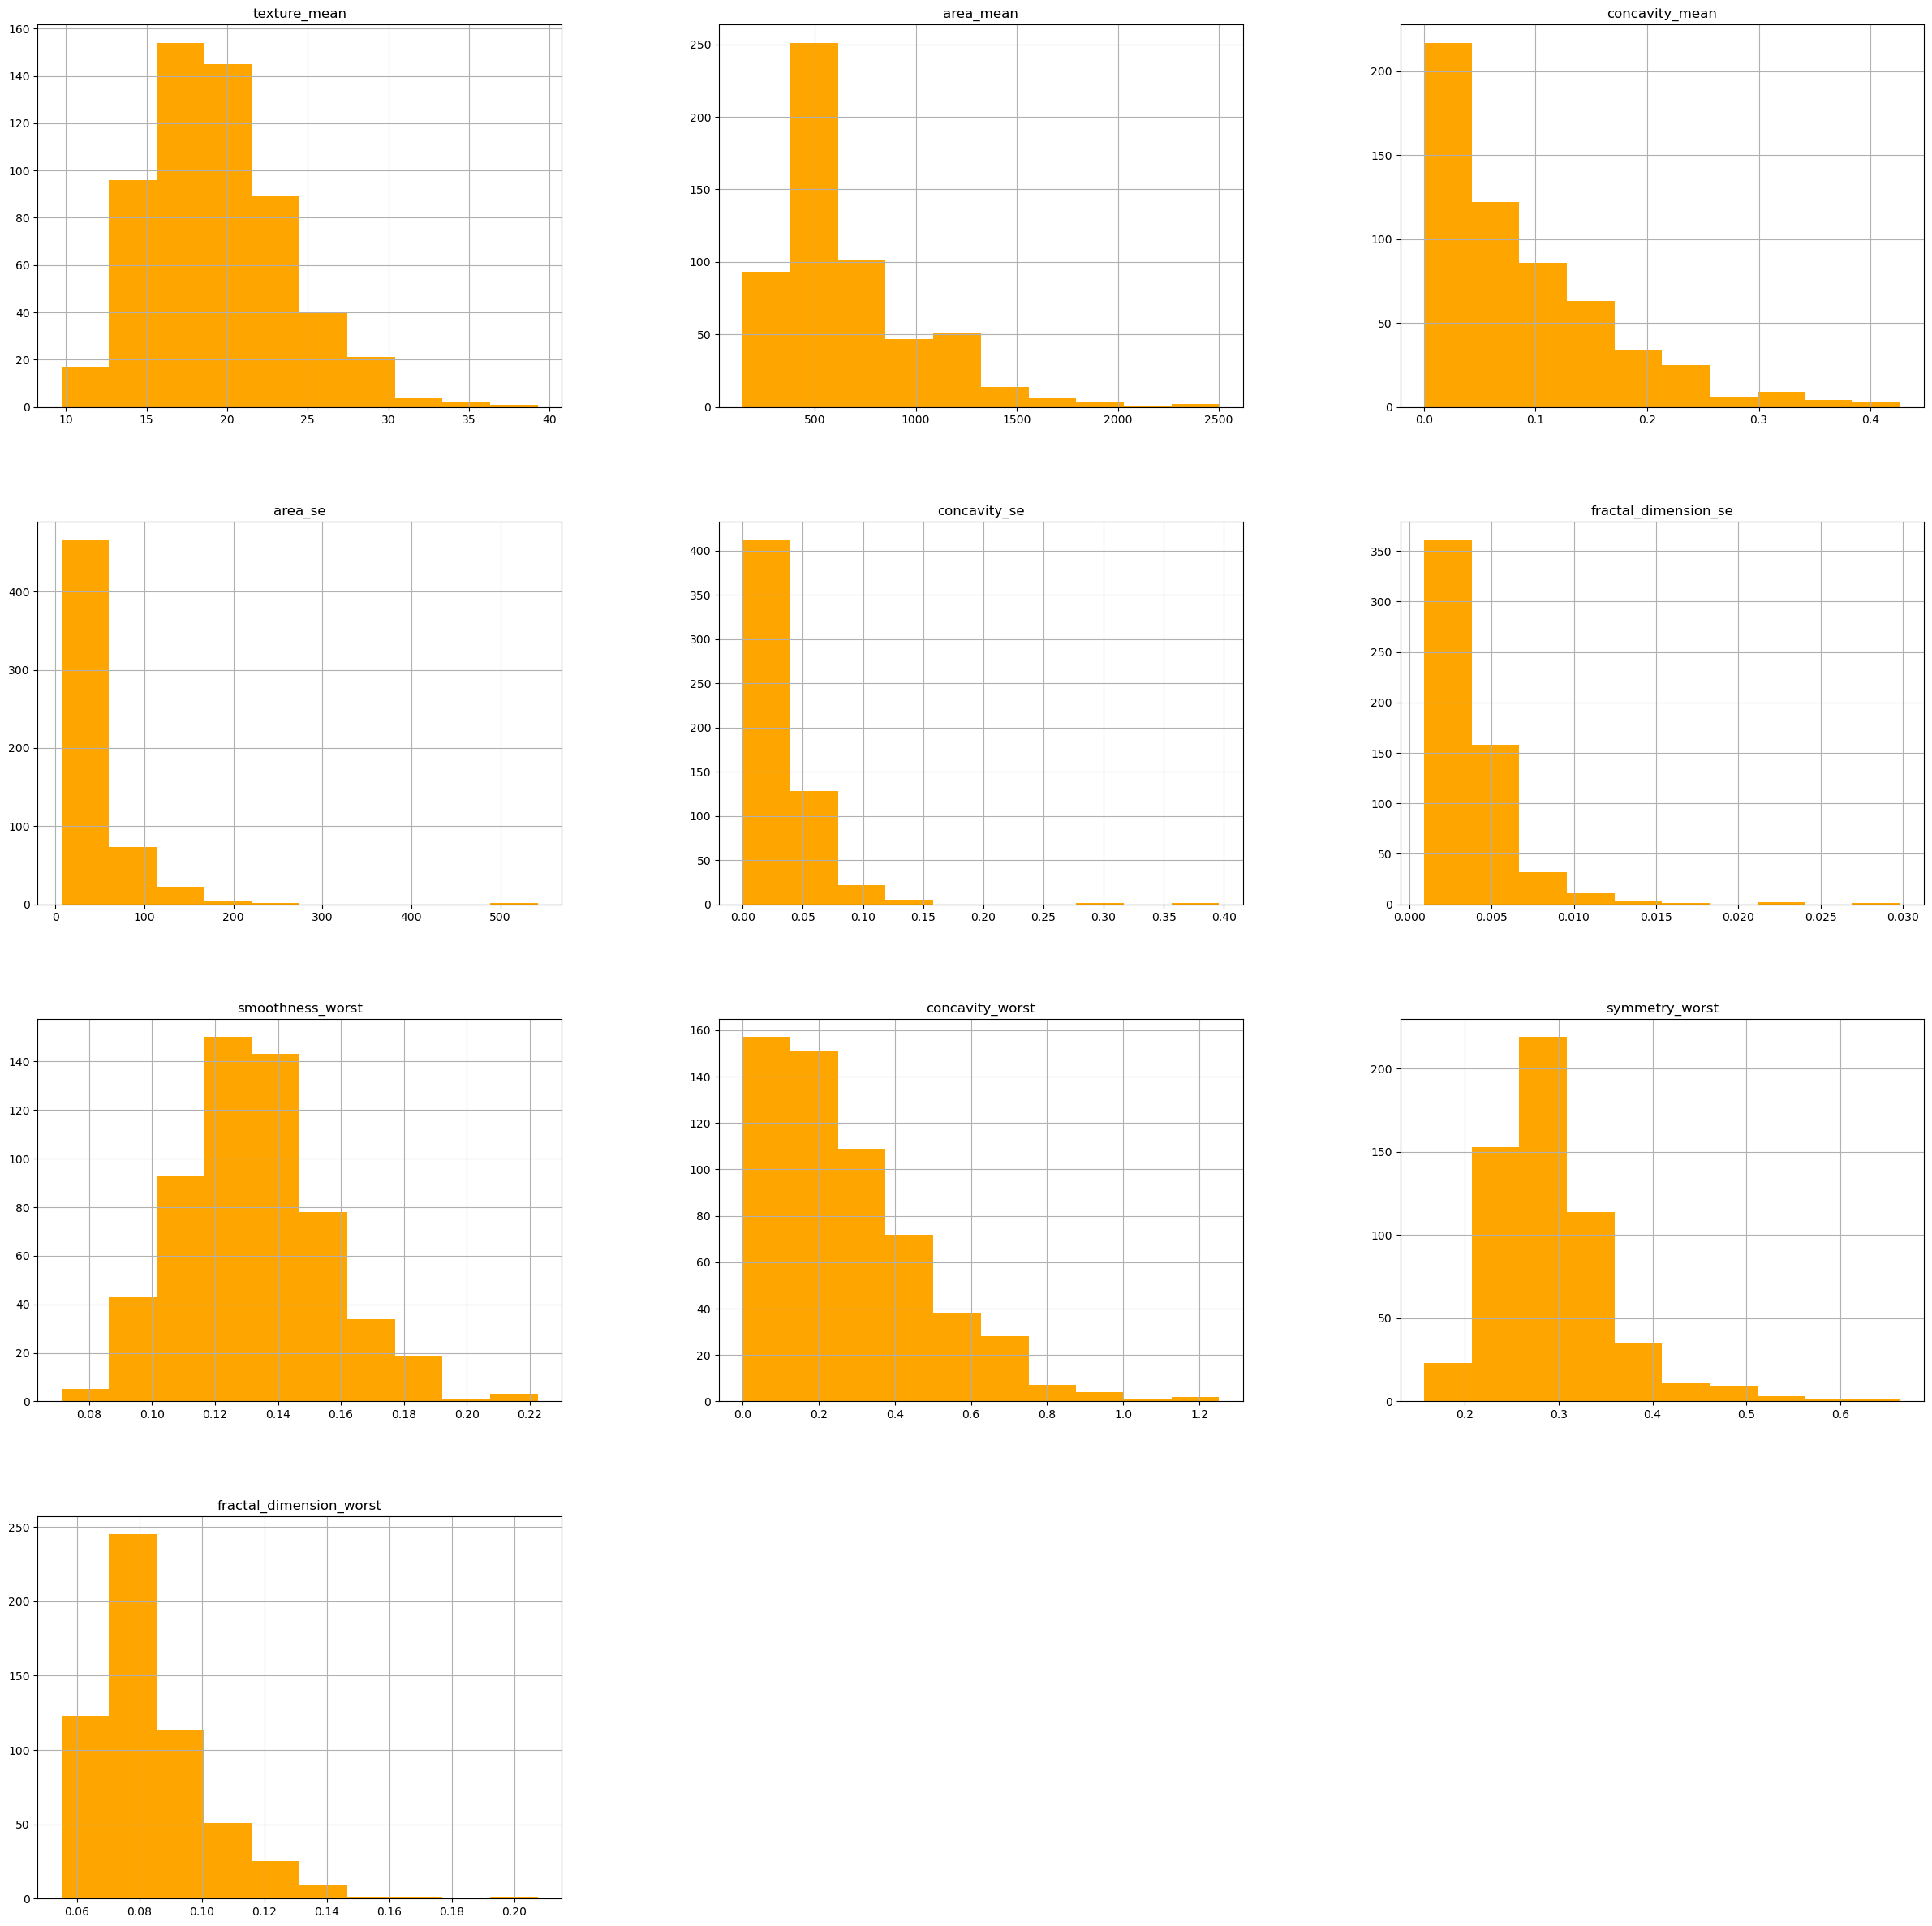

In [9]:
df.hist(figsize = (30,30), color = 'orange')
plt.show()

## Data Pre-Processing

## 1. Missing Values

In [10]:
df.isnull().sum()

diagnosis                  0
texture_mean               0
area_mean                  0
concavity_mean             0
area_se                    0
concavity_se               0
fractal_dimension_se       0
smoothness_worst           0
concavity_worst            0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### 2. Label Encoding

In [11]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [12]:
lb = LabelEncoder()
df['diagnosis'] = lb.fit_transform(df['diagnosis'])

In [13]:
df.tail(10)

,diagnosis,texture_mean,area_mean,concavity_mean,area_se,concavity_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
559,0,23.93,403.5,0.11120,16.97,0.05738,0.004738,0.12980,0.3630,0.2112,0.08732
560,0,27.15,600.4,0.04462,29.84,0.02071,0.005304,0.12410,0.1326,0.2250,0.08321
561,0,29.37,386.0,0.00000,22.81,0.00000,0.001773,0.09267,0.0000,0.1566,0.05905
562,1,30.62,716.9,0.25500,22.65,0.07359,0.006142,0.14170,1.1700,0.4089,0.14090
563,1,25.09,1347.0,0.31740,118.80,0.07845,0.006213,0.14070,0.6599,0.2929,0.09873
564,1,22.39,1479.0,0.24390,158.70,0.05198,0.004239,0.14100,0.4107,0.2060,0.07115
565,1,28.25,1261.0,0.14400,99.04,0.03950,0.002498,0.11660,0.3215,0.2572,0.06637
566,1,28.08,858.1,0.09251,48.55,0.04730,0.003892,0.11390,0.3403,0.2218,0.07820
567,1,29.33,1265.0,0.35140,86.22,0.07117,0.006185,0.16500,0.9387,0.4087,0.12400
568,0,24.54,181.0,0.00000,19.15,0.00000,0.002783,0.08996,0.0000,0.2871,0.07039


### 3. Train_Test_split

In [14]:
X = df[['texture_mean','area_mean','concavity_mean','area_se','concavity_se','fractal_dimension_se','smoothness_worst','concavity_worst', 'symmetry_worst','fractal_dimension_worst']]
y = df['diagnosis']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=0)

In [16]:
X.shape,y.shape

((569, 10), (569,))

In [17]:
X_train.shape,y_train.shape

((398, 10), (398,))

### 4. Feature Standardization

In [18]:
scaler =StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

## Prediction model using Logistix Regression

In [19]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [20]:
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

In [21]:
feature_value = [np.array(x_test[0])]
feature_value

[array([ 0.31710749, -0.2872433 ,  0.71366732, -0.15500641,  0.11542304,
         0.10246308,  1.08320449,  1.25420187,  1.0939611 ,  1.51560644])]

In [22]:
feature_name = ['texture_mean','area_mean','concavity_mean','area_se',
                 'concavity_se','fractal_dimension_se','smoothness_worst',
                 'concavity_worst','symmetry_worst','fractal_dimension_worst']
df = pd.DataFrame(feature_value, columns=feature_name)
output = lr.predict(df)
output

array([1])

In [23]:
x_test[0]

array([ 0.31710749, -0.2872433 ,  0.71366732, -0.15500641,  0.11542304,
        0.10246308,  1.08320449,  1.25420187,  1.0939611 ,  1.51560644])

In [24]:
x_test[1]

array([ 1.44727832, -0.33859574, -0.78244669, -0.4783063 , -0.56501333,
       -0.72394135, -0.15805578, -0.67112117, -0.70686766, -0.88310324])

In [30]:
train_accuracy = accuracy_score(y_train,y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)
print(f"Training Accuracy = {train_accuracy}\nTesting  Accuracy = {test_accuracy}")

Training Accuracy = 0.9824120603015075
Testing  Accuracy = 0.9649122807017544


In [33]:
np.mean(cross_val_score(lr,x,y,cv=5,scoring="accuracy"))

NameError: name 'x' is not defined

In [34]:
plot_confusion_matrix(lr, x_test, y_test) 
plt.show()

NameError: name 'plot_confusion_matrix' is not defined

In [35]:
print(classification_report(y_test, y_test_pred ))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [40]:
import numpy as np
data = np.random.normal(0, 1, 100)
mean = np.mean(data)
std_dev = np.std(data)
print(f"Mean: {mean:.2f}")
print(f"Standard deviation: {std_dev:.2f}")

[ 1.2247349   0.65673358  0.77051593  0.98216313 -1.37902157 -0.10298669
  0.68536449  0.23313835 -2.37588724 -1.17318524 -0.876546   -0.4424374
  1.04506131 -0.32311434 -0.34818089  0.69093371 -0.70878221  0.80998821
 -0.87401623  0.11263283  0.56139752  0.70808781  1.90525421 -0.49120798
 -2.31024533 -1.33680883 -0.60826674  0.57803728 -0.54601384 -0.34780723
  1.07531094  0.08135718  0.53912771 -0.24689486 -0.08799046 -0.1184942
 -0.06692868  0.13003187 -1.14471327  0.42656509  0.15632967  1.80933327
  0.77449606 -0.32678765 -1.88470056  0.08903287 -0.26654977 -0.11197318
  1.09703566  0.28703507  0.53251175 -2.20523669  1.40099863  0.69054312
  0.15905692 -0.73409061 -0.26897949 -0.15466896 -1.20330489 -0.01096073
  0.29605513 -0.472079   -0.0976298  -0.29010002 -0.31678882 -0.62794053
  0.87490734  0.11108531  0.41046464  0.34209843  0.86100776  0.66088639
 -1.61148194 -0.37908204  1.12712657  1.28545003  0.6280043   0.69479166
 -0.79999676  0.88330002  0.27945141  0.46778917 -0.1